## 1-- Exploratory Data Analysis

1.1-- Importing various modules

In [1]:
# Ignore  the warnings
import warnings
warnings.filterwarnings('always')
warnings.filterwarnings('ignore')

# data visualisation and manipulation
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib import style
import seaborn as sns

#configure
# sets matplotlib to inline and displays graphs below the corressponding cell.
%matplotlib inline  
style.use('fivethirtyeight')
sns.set(style='whitegrid',color_codes=True)

#import the necessary modelling algos.
from sklearn.linear_model import LogisticRegression
from sklearn.svm import LinearSVC
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier



#model selection
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score,precision_score,recall_score,confusion_matrix,roc_curve,roc_auc_score,f1_score
from sklearn.model_selection import GridSearchCV

#preprocessing

from sklearn import preprocessing 

1.2-- Reading the data from the CSV file

In [2]:
df = pd.read_csv(r"C:\Users\hp\Desktop\ML Project\train.csv")

In [3]:
df.head()

,Id,Age,Attrition,BusinessTravel,Department,DistanceFromHome,Education,EducationField,EmployeeNumber,EnvironmentSatisfaction,...,PerformanceRating,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager,CommunicationSkill,Behaviour
0,1,30,0,Non-Travel,Research & Development,2,3,Medical,571,3,...,3,0,12,2,11,7,6,7,4,1
1,2,36,0,Travel_Rarely,Research & Development,12,4,Life Sciences,1614,3,...,3,2,7,2,3,2,1,1,2,1
2,3,55,1,Travel_Rarely,Sales,2,1,Medical,842,3,...,3,0,12,3,9,7,7,3,5,1
3,4,39,0,Travel_Rarely,Research & Development,24,1,Life Sciences,2014,1,...,3,0,18,2,7,7,1,7,4,1
4,5,37,0,Travel_Rarely,Research & Development,3,3,Other,689,3,...,3,1,10,2,10,7,7,8,1,1


In [4]:
df.shape

(1628, 29)

In [5]:
df.columns

Index(['Id', 'Age', 'Attrition', 'BusinessTravel', 'Department',
       'DistanceFromHome', 'Education', 'EducationField', 'EmployeeNumber',
       'EnvironmentSatisfaction', 'Gender', 'JobInvolvement', 'JobRole',
       'JobSatisfaction', 'MaritalStatus', 'MonthlyIncome',
       'NumCompaniesWorked', 'OverTime', 'PercentSalaryHike',
       'PerformanceRating', 'StockOptionLevel', 'TotalWorkingYears',
       'TrainingTimesLastYear', 'YearsAtCompany', 'YearsInCurrentRole',
       'YearsSinceLastPromotion', 'YearsWithCurrManager', 'CommunicationSkill',
       'Behaviour'],
      dtype='object')

1.3 -- Finding missing values and their treatment

In [6]:
df.isnull().any().sum()

0

1.4 -- The features and the 'TARGET'

We have 28 features consisting of both the categorical as well as the numerical features. The target variable is the 'Attrition' of the employee which can be 0 or 1.

hence this is a "binary classification"

1.5-- Univariate Analysis

In [7]:
df.describe()

,Id,Age,Attrition,DistanceFromHome,Education,EmployeeNumber,EnvironmentSatisfaction,JobInvolvement,JobSatisfaction,MonthlyIncome,...,PerformanceRating,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager,CommunicationSkill,Behaviour
count,1628.000000,1628.000000,1628.000000,1628.000000,1628.000000,1628.000000,1628.000000,1628.000000,1628.000000,1628.000000,...,1628.000000,1628.000000,1628.000000,1628.000000,1628.000000,1628.000000,1628.000000,1628.000000,1628.000000,1628.0
mean,814.500000,35.645577,0.482187,9.735258,2.884521,1000.985872,2.646192,2.650491,2.639435,5785.524570,...,3.155405,0.692260,9.949017,2.752457,6.092752,3.614865,2.049140,3.551597,3.135749,1.0
std,470.107435,9.481794,0.499836,8.306546,1.020470,585.417694,1.125283,0.736330,1.096272,4339.293147,...,0.362402,0.864808,7.482936,1.288033,5.921168,3.481051,3.138287,3.494369,1.408770,0.0
min,1.000000,18.000000,0.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1009.000000,...,3.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.0
25%,407.750000,29.000000,0.000000,2.000000,2.000000,509.250000,2.000000,2.000000,2.000000,2625.000000,...,3.000000,0.000000,5.000000,2.000000,2.000000,1.000000,0.000000,0.000000,2.000000,1.0
50%,814.500000,34.000000,0.000000,8.000000,3.000000,977.000000,3.000000,3.000000,3.000000,4304.000000,...,3.000000,0.000000,8.000000,3.000000,5.000000,2.000000,1.000000,2.000000,3.000000,1.0
75%,1221.250000,42.000000,1.000000,15.000000,4.000000,1494.000000,4.000000,3.000000,4.000000,7124.250000,...,3.000000,1.000000,13.000000,3.000000,8.000000,7.000000,2.000000,7.000000,4.000000,1.0
max,1628.000000,60.000000,1.000000,29.000000,5.000000,2068.000000,4.000000,4.000000,4.000000,19999.000000,...,4.000000,3.000000,38.000000,6.000000,37.000000,18.000000,15.000000,17.000000,5.000000,1.0


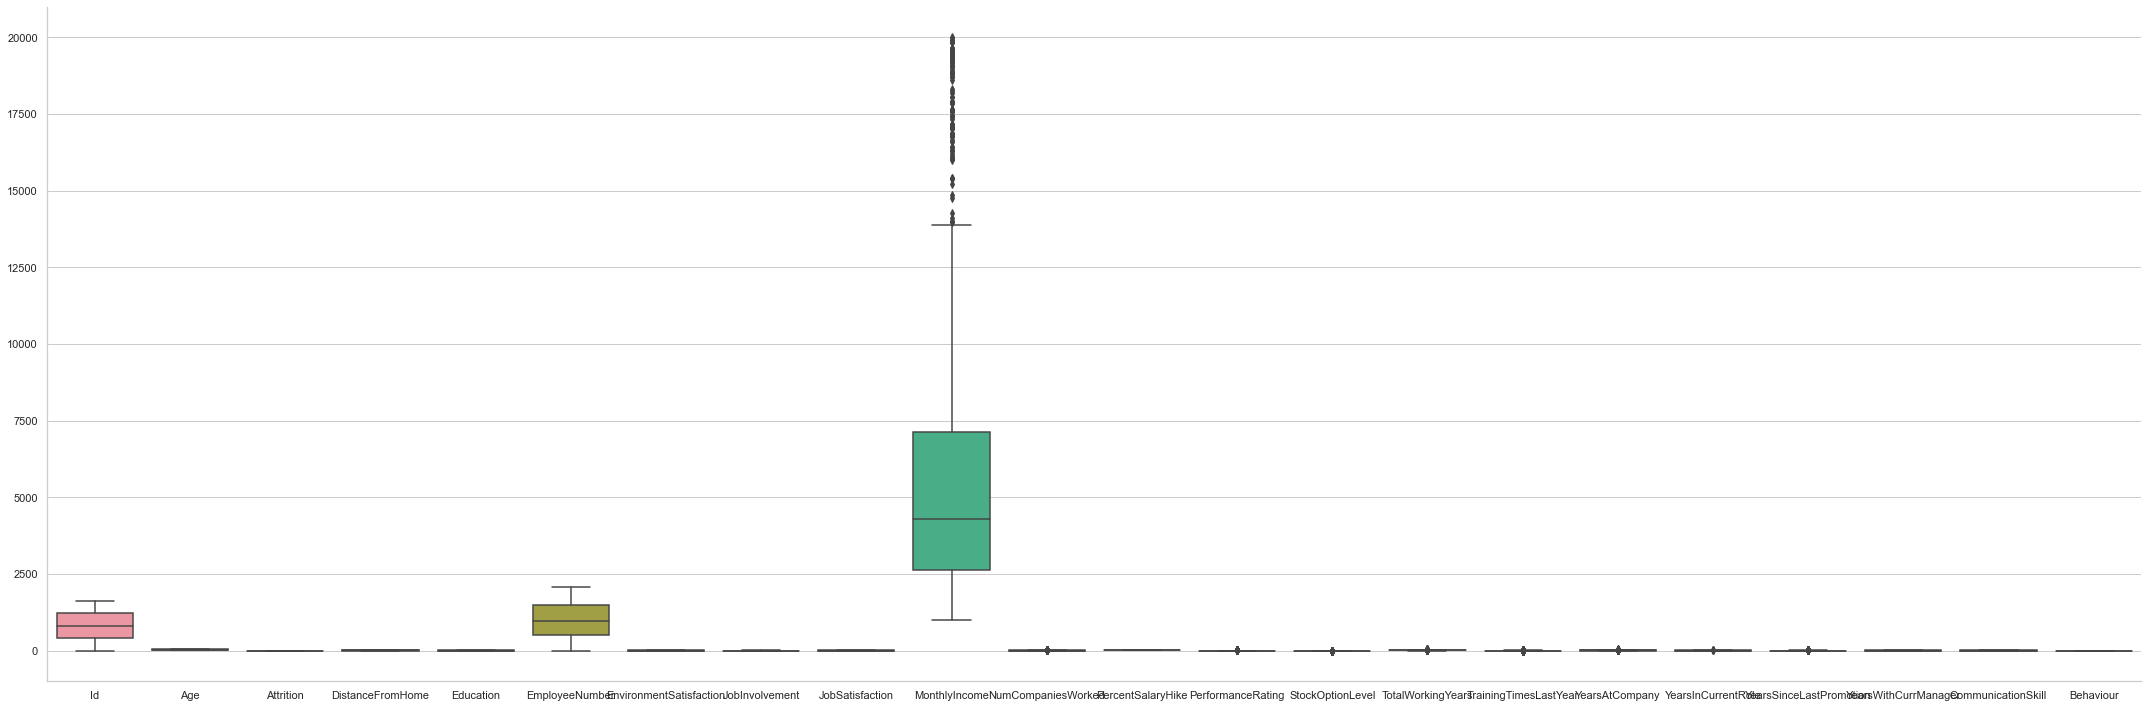

In [8]:
sns.factorplot(data=df, kind='box', size=10, aspect=3)

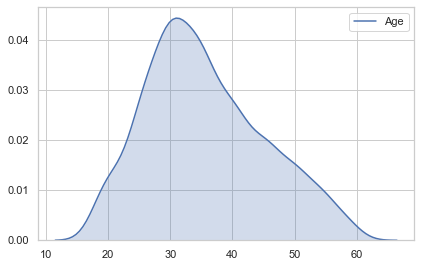

In [9]:
sns.kdeplot(df['Age'], shade= True)

In [10]:
cat_df = df.select_dtypes(include='object')

In [11]:
cat_df.columns

Index(['BusinessTravel', 'Department', 'EducationField', 'Gender', 'JobRole',
       'MaritalStatus', 'OverTime'],
      dtype='object')

In [12]:
df.Attrition.value_counts()

0    843
1    785
Name: Attrition, dtype: int64

In [13]:
def plot_cat(attr, labels = None):
    if(attr == 'JobRole'):
        sns.factorplot(data=df, kind='count', size=5, aspect=3, x=attr)
        return
    
    sns.factorplot(data=df, kind='count', size=5, aspect=1.5, x=attr)

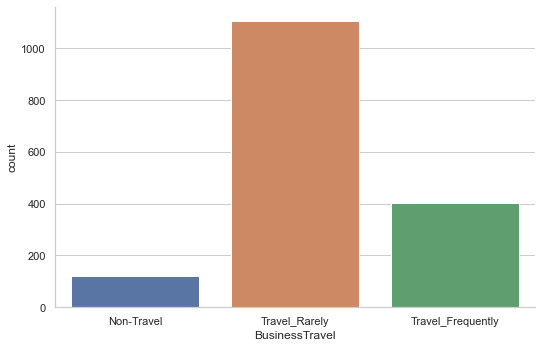

In [14]:
plot_cat('BusinessTravel')

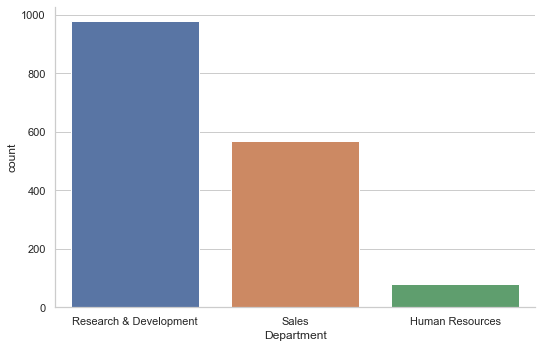

In [15]:
plot_cat('Department')

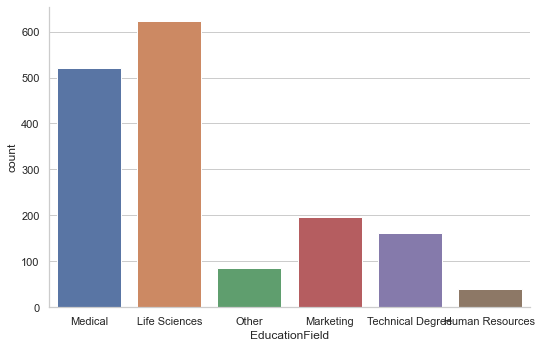

In [16]:
plot_cat('EducationField')

## 2-- Corelation b/w features

,Id,Age,Attrition,DistanceFromHome,Education,EmployeeNumber,EnvironmentSatisfaction,JobInvolvement,JobSatisfaction,MonthlyIncome,...,PerformanceRating,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager,CommunicationSkill,Behaviour
Id,1.000000,-0.156452,0.694838,0.072305,-0.035610,-0.038404,-0.100908,-0.127778,-0.105379,-0.178736,...,0.022698,-0.118617,-0.193855,-0.080326,-0.156880,-0.183577,-0.039062,-0.164596,0.083742,NaN
Age,-0.156452,1.000000,-0.200596,0.020658,0.219237,0.024386,0.001950,0.073185,0.037604,0.509210,...,0.002982,0.126257,0.675578,0.004789,0.355438,0.266728,0.222113,0.263792,0.019341,NaN
Attrition,0.694838,-0.200596,1.000000,0.109224,-0.041390,-0.051512,-0.111746,-0.159710,-0.148012,-0.240479,...,0.010202,-0.175496,-0.262922,-0.105663,-0.230061,-0.269408,-0.050379,-0.222752,0.103379,NaN
DistanceFromHome,0.072305,0.020658,0.109224,1.000000,0.023945,0.051568,-0.046390,0.016316,-0.097558,0.012521,...,0.071457,0.029378,0.029289,-0.032038,-0.030392,-0.010607,0.004460,-0.004135,-0.036109,NaN
Education,-0.035610,0.219237,-0.041390,0.023945,1.000000,0.077561,-0.065041,0.083673,-0.036143,0.119907,...,-0.036204,0.042585,0.175662,-0.043272,0.145911,0.076579,0.076430,0.121981,0.000223,NaN
EmployeeNumber,-0.038404,0.024386,-0.051512,0.051568,0.077561,1.000000,0.001229,0.026756,-0.040180,0.021210,...,-0.049489,0.126275,0.032632,-0.008625,0.045468,0.019844,0.018699,0.047598,-0.009926,NaN
EnvironmentSatisfaction,-0.100908,0.001950,-0.111746,-0.046390,-0.065041,0.001229,1.000000,-0.000977,0.035033,-0.033990,...,-0.041427,-0.006479,-0.019005,0.020531,0.000685,0.008028,0.014325,0.002457,-0.011557,NaN
JobInvolvement,-0.127778,0.073185,-0.159710,0.016316,0.083673,0.026756,-0.000977,1.000000,-0.005453,0.005859,...,-0.063512,0.061673,0.037145,-0.027122,-0.008208,0.029460,0.006373,0.062552,0.052877,NaN
JobSatisfaction,-0.105379,0.037604,-0.148012,-0.097558,-0.036143,-0.040180,0.035033,-0.005453,1.000000,0.003255,...,-0.078554,0.024867,0.012892,-0.012757,0.023714,0.036065,0.004439,-0.006131,-0.051464,NaN
MonthlyIncome,-0.178736,0.509210,-0.240479,0.012521,0.119907,0.021210,-0.033990,0.005859,0.003255,1.000000,...,-0.037533,0.012281,0.759658,-0.020173,0.536715,0.418501,0.340080,0.401007,-0.060311,NaN


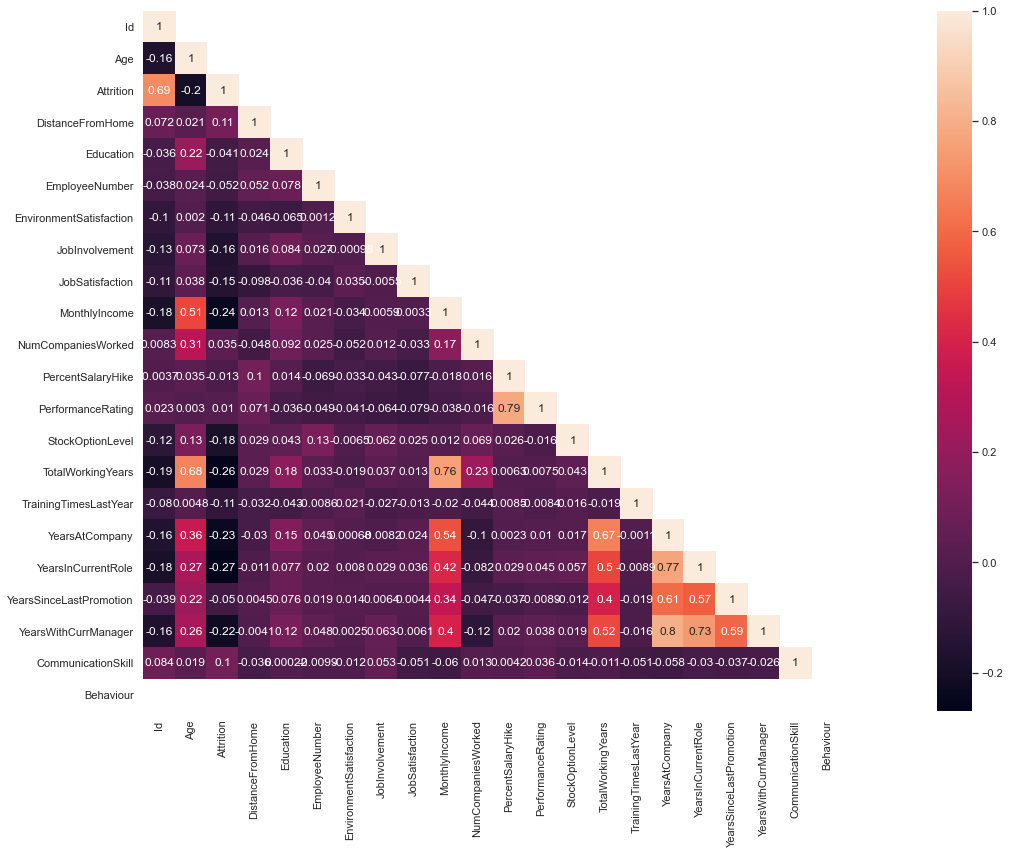

In [17]:
## corelation matrix
cor_mat = df.corr()
mask = np.array(cor_mat)
mask[np.tril_indices_from(mask)] = False
fig = plt.gcf()
fig.set_size_inches(30,12)
sns.heatmap(data=cor_mat, mask=mask, square=True, annot=True, cbar=True)
cor_mat

## 3-- Feature Selection 

3.1 -- Plotting the features against the 'Target' variable

3.1.1 -- Age

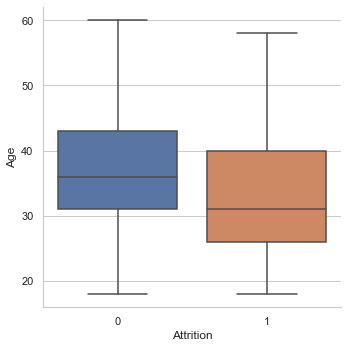

In [18]:
sns.factorplot(data=df, y='Age', x='Attrition', size=5, aspect=1, kind='box')

3.1.2 -- Department

In [19]:
df.Department.value_counts()

Research & Development    979
Sales                     568
Human Resources            81
Name: Department, dtype: int64

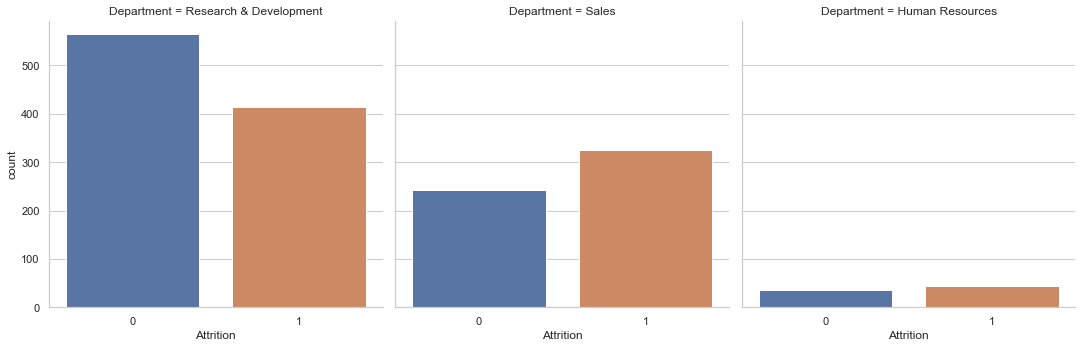

In [20]:
sns.factorplot(data=df,kind='count', col='Department', x='Attrition')

3.1.3 -- Gender

In [21]:
pd.crosstab(columns=[df.Attrition], index=[df.Gender], margins=True, normalize='index')

Attrition,0,1
Gender,,
Female,0.533228,0.466772
Male,0.508032,0.491968
All,0.517813,0.482187


3.1.4 -- Job Satisfaction

In [22]:
pd.crosstab(columns=[df.Attrition], index=[df.JobSatisfaction], margins=True, normalize='index')

Attrition,0,1
JobSatisfaction,,
1,0.410112,0.589888
2,0.498382,0.501618
3,0.508507,0.491493
4,0.631336,0.368664
All,0.517813,0.482187


3.2 -- Feature Selection

In [23]:
pd.crosstab(columns=[df.Attrition], index=[df.NumCompaniesWorked], margins=True, normalize='index')

Attrition,0,1
NumCompaniesWorked,,
0,0.570707,0.429293
1,0.472817,0.527183
2,0.605263,0.394737
3,0.675325,0.324675
4,0.554795,0.445205
5,0.428571,0.571429
6,0.387755,0.612245
7,0.444444,0.555556
8,0.673913,0.326087


In [24]:
pd.crosstab(columns=[df.Attrition], index=[df.StockOptionLevel], margins=True, normalize='index')

Attrition,0,1
StockOptionLevel,,
0,0.389952,0.610048
1,0.676840,0.323160
2,0.666667,0.333333
3,0.500000,0.500000
All,0.517813,0.482187


In [25]:
pd.crosstab(columns=[df.Attrition], index=[df.TrainingTimesLastYear], margins=True, normalize='index')

Attrition,0,1
TrainingTimesLastYear,,
0,0.324324,0.675676
1,0.487179,0.512821
2,0.491803,0.508197
3,0.559925,0.440075
4,0.424460,0.575540
5,0.586466,0.413534
6,0.750000,0.250000
All,0.517813,0.482187


In [26]:
df.drop(['Id','EmployeeNumber','Behaviour'], axis=1, inplace=True)

In [27]:
df.shape

(1628, 26)

## 4-- Preparing Dataset

4.1 -- Feature Encoding

In [28]:
def transform(feature):
    le=preprocessing.LabelEncoder()
    df[feature] = le.fit_transform(df[feature])
    print(le.classes_)

In [29]:
cat_df = df.select_dtypes(include='object')
cat_df.columns

Index(['BusinessTravel', 'Department', 'EducationField', 'Gender', 'JobRole',
       'MaritalStatus', 'OverTime'],
      dtype='object')

In [30]:
for col in cat_df.columns:
    transform(col)

['Non-Travel' 'Travel_Frequently' 'Travel_Rarely']
['Human Resources' 'Research & Development' 'Sales']
['Human Resources' 'Life Sciences' 'Marketing' 'Medical' 'Other'
 'Technical Degree']
['Female' 'Male']
['Healthcare Representative' 'Human Resources' 'Laboratory Technician'
 'Manager' 'Manufacturing Director' 'Research Director'
 'Research Scientist' 'Sales Executive' 'Sales Representative']
['Divorced' 'Married' 'Single']
['No' 'Yes']


In [31]:
df.head()

,Age,Attrition,BusinessTravel,Department,DistanceFromHome,Education,EducationField,EnvironmentSatisfaction,Gender,JobInvolvement,...,PercentSalaryHike,PerformanceRating,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager,CommunicationSkill
0,30,0,0,1,2,3,3,3,0,3,...,14,3,0,12,2,11,7,6,7,4
1,36,0,2,1,12,4,1,3,0,3,...,12,3,2,7,2,3,2,1,1,2
2,55,1,2,2,2,1,3,3,1,3,...,16,3,0,12,3,9,7,7,3,5
3,39,0,2,1,24,1,1,1,1,3,...,13,3,0,18,2,7,7,1,7,4
4,37,0,2,1,3,3,4,3,1,3,...,15,3,1,10,2,10,7,7,8,1


In [32]:
X = df.drop('Attrition', axis = 1)
Y = df.Attrition

In [33]:
X.head(3)

,Age,BusinessTravel,Department,DistanceFromHome,Education,EducationField,EnvironmentSatisfaction,Gender,JobInvolvement,JobRole,...,PercentSalaryHike,PerformanceRating,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager,CommunicationSkill
0,30,0,1,2,3,3,3,0,3,2,...,14,3,0,12,2,11,7,6,7,4
1,36,2,1,12,4,1,3,0,3,4,...,12,3,2,7,2,3,2,1,1,2
2,55,2,2,2,1,3,3,1,3,7,...,16,3,0,12,3,9,7,7,3,5


In [34]:
Y.head(3)

0    0
1    0
2    1
Name: Attrition, dtype: int64

4.2 -- Splitting the data into training and validation sets

In [35]:
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.22, random_state=0)

In [36]:
classifier = DecisionTreeClassifier(criterion="gini", max_depth=5,min_samples_split=2,  min_samples_leaf=1,random_state=42) 
classifier.fit(X_train, y_train)

# Predicting Test Set
y_pred = classifier.predict(X_test)
acc = accuracy_score(y_test, y_pred)
prec = precision_score(y_test, y_pred)
rec = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)
results = pd.DataFrame([['DecisionTree', acc, prec, rec, f1]],
               columns = ['Model', 'Accuracy', 'Precision', 'Recall', 'F1 Score'])

results

,Model,Accuracy,Precision,Recall,F1 Score
0,DecisionTree,0.774373,0.798851,0.751351,0.774373


In [37]:
## Randomforest
from sklearn.ensemble import RandomForestClassifier
classifier = RandomForestClassifier(random_state = 0, n_estimators = 100,
                                    criterion = 'entropy')
classifier.fit(X_train, y_train)

# Predicting Test Set
y_pred = classifier.predict(X_test)
acc = accuracy_score(y_test, y_pred)
prec = precision_score(y_test, y_pred)
rec = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)

model_results = pd.DataFrame([['Random Forest (n=100)', acc, prec, rec, f1]],
               columns = ['Model', 'Accuracy', 'Precision', 'Recall', 'F1 Score'])

results = results.append(model_results, ignore_index = True)
results

,Model,Accuracy,Precision,Recall,F1 Score
0,DecisionTree,0.774373,0.798851,0.751351,0.774373
1,Random Forest (n=100),0.966574,0.962567,0.972973,0.967742


In [38]:
from sklearn.ensemble import GradientBoostingClassifier
classifier1 = GradientBoostingClassifier( n_estimators=1900, learning_rate=0.01,
                                   max_depth=4, max_features='sqrt',
                                   min_samples_leaf=15, min_samples_split=10, 
                                   random_state =5)
classifier1.fit(X_train, y_train)

# Predicting Test Set
y_pred = classifier1.predict(X_test)
acc = accuracy_score(y_test, y_pred)
prec = precision_score(y_test, y_pred)
rec = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)

model_results = pd.DataFrame([['GradientBoostingclassifier (n=100)', acc, prec, rec, f1]],
               columns = ['Model', 'Accuracy', 'Precision', 'Recall', 'F1 Score'])

results = results.append(model_results, ignore_index = True)

In [39]:
results

,Model,Accuracy,Precision,Recall,F1 Score
0,DecisionTree,0.774373,0.798851,0.751351,0.774373
1,Random Forest (n=100),0.966574,0.962567,0.972973,0.967742
2,GradientBoostingclassifier (n=100),0.958217,0.947368,0.972973,0.960000


In [40]:
test_data = pd.read_csv(r"C:\Users\hp\Desktop\ML Project\test.csv")
test_data.head()

,Id,Age,BusinessTravel,Department,DistanceFromHome,Education,EducationField,EmployeeNumber,EnvironmentSatisfaction,Gender,...,PerformanceRating,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager,CommunicationSkill,Behaviour
0,1,28,Travel_Rarely,Research & Development,9,3,Medical,377,4,Male,...,4,1,5,3,5,2,0,4,5,1
1,2,31,Travel_Rarely,Sales,6,4,Medical,653,1,Male,...,4,2,13,4,7,7,5,7,3,1
2,3,37,Travel_Rarely,Research & Development,6,3,Medical,474,3,Male,...,3,2,13,2,7,7,6,7,4,1
3,4,42,Travel_Rarely,Research & Development,1,2,Life Sciences,827,4,Female,...,3,1,8,4,4,3,0,2,5,1
4,5,45,Non-Travel,Research & Development,4,2,Life Sciences,972,3,Male,...,3,0,9,5,9,7,0,8,2,1


In [41]:
test_data.shape

(470, 28)

In [42]:
df1 = test_data.drop([ 'Id','EmployeeNumber','Behaviour'], axis=1)

In [43]:
df1.shape

(470, 25)

In [44]:
cat_df1 = df1.select_dtypes(include='object')
cat_df1.columns

Index(['BusinessTravel', 'Department', 'EducationField', 'Gender', 'JobRole',
       'MaritalStatus', 'OverTime'],
      dtype='object')

In [45]:
def transform1(feature):
    le=preprocessing.LabelEncoder()
    df1[feature] = le.fit_transform(df1[feature])
    print(le.classes_)

In [46]:
for p in cat_df1.columns:
    transform1(p)

['Non-Travel' 'Travel_Frequently' 'Travel_Rarely']
['Human Resources' 'Research & Development' 'Sales']
['Human Resources' 'Life Sciences' 'Marketing' 'Medical' 'Other'
 'Technical Degree']
['Female' 'Male']
['Healthcare Representative' 'Human Resources' 'Laboratory Technician'
 'Manager' 'Manufacturing Director' 'Research Director'
 'Research Scientist' 'Sales Executive' 'Sales Representative']
['Divorced' 'Married' 'Single']
['No' 'Yes']


In [47]:
df1.head()

,Age,BusinessTravel,Department,DistanceFromHome,Education,EducationField,EnvironmentSatisfaction,Gender,JobInvolvement,JobRole,...,PercentSalaryHike,PerformanceRating,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager,CommunicationSkill
0,28,2,1,9,3,3,4,1,3,6,...,23,4,1,5,3,5,2,0,4,5
1,31,2,2,6,4,3,1,1,4,7,...,22,4,2,13,4,7,7,5,7,3
2,37,2,1,6,3,3,3,1,4,6,...,13,3,2,13,2,7,7,6,7,4
3,42,2,1,1,2,1,4,0,2,4,...,13,3,1,8,4,4,3,0,2,5
4,45,0,1,4,2,1,3,1,3,2,...,12,3,0,9,5,9,7,0,8,2


In [48]:
from sklearn.ensemble import RandomForestClassifier
classifier = RandomForestClassifier(random_state = 0, n_estimators = 100,
                                    criterion = 'entropy')
classifier.fit(X_train, y_train)
predictions = classifier.predict(df1)

output = pd.DataFrame({'Id': test_data.Id, 'Attrition': classifier.predict_proba(df1)[:,1]})
output.to_csv('random_forest_classifier.csv', index=False)

In [49]:
output

,Id,Attrition
0,1,0.07
1,2,0.08
2,3,0.17
3,4,0.27
4,5,0.06
...,...,...
465,466,0.52
466,467,0.84
467,468,0.44
468,469,0.11


In [150]:
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.28, random_state=0)

In [151]:
from sklearn.ensemble import GradientBoostingClassifier
classifier1 = GradientBoostingClassifier( n_estimators=747, learning_rate=0.03,
                                   max_depth=4, max_features='sqrt',
                                   min_samples_leaf=15, min_samples_split=10, 
                                   random_state =5)
classifier1.fit(X_train, y_train)

# Predicting Test Set
y_pred = classifier1.predict(X_test)
acc = accuracy_score(y_test, y_pred)
prec = precision_score(y_test, y_pred)
rec = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)

model_results = pd.DataFrame([['GradientBoostingclassifier (n=100)', acc, prec, rec, f1]],
               columns = ['Model', 'Accuracy', 'Precision', 'Recall', 'F1 Score'])

results = results.append(model_results, ignore_index = True)

In [152]:
tests=classifier1.predict_proba(df1)
acc




0.9364035087719298

In [153]:
tests

array([[0.97434233, 0.02565767],
       [0.9841635 , 0.0158365 ],
       [0.95888333, 0.04111667],
       [0.94493942, 0.05506058],
       [0.99730665, 0.00269335],
       [0.90511545, 0.09488455],
       [0.67499217, 0.32500783],
       [0.96987738, 0.03012262],
       [0.79341114, 0.20658886],
       [0.99289512, 0.00710488],
       [0.99576561, 0.00423439],
       [0.96932509, 0.03067491],
       [0.99335424, 0.00664576],
       [0.99556771, 0.00443229],
       [0.95317512, 0.04682488],
       [0.94483953, 0.05516047],
       [0.56640596, 0.43359404],
       [0.92323988, 0.07676012],
       [0.96075138, 0.03924862],
       [0.99753312, 0.00246688],
       [0.9777733 , 0.0222267 ],
       [0.05472368, 0.94527632],
       [0.9638686 , 0.0361314 ],
       [0.98856328, 0.01143672],
       [0.92388447, 0.07611553],
       [0.99689501, 0.00310499],
       [0.99264135, 0.00735865],
       [0.98836294, 0.01163706],
       [0.01458325, 0.98541675],
       [0.98224625, 0.01775375],
       [0.

In [89]:
file1=pd.DataFrame(tests)

In [90]:
pd.options.display.float_format='{:.6f}'.format

In [91]:
file1

,0,1
0,0.958280,0.041720
1,0.979202,0.020798
2,0.945139,0.054861
3,0.926093,0.073907
4,0.995001,0.004999
...,...,...
465,0.335375,0.664625
466,0.008826,0.991174
467,0.771379,0.228621
468,0.951792,0.048208


In [81]:
file1.drop(file1.columns[[0]], axis = 1, inplace = True)

In [82]:
file1.rename(columns={1: 'Attrition'},inplace=True)

In [83]:
file1.insert(0, "Id", [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17,
          18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34,
          35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51,
          52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68,
          69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84, 85,
          86, 87, 88, 89, 90, 91, 92, 93, 94, 95, 96, 97, 98, 99, 100, 101, 102,
          103, 104, 105, 106, 107, 108, 109, 110, 111, 112, 113, 114, 115, 116,
          117, 118, 119, 120, 121, 122, 123, 124, 125, 126, 127, 128, 129, 130,
          131, 132, 133, 134, 135, 136, 137, 138, 139, 140, 141, 142, 143, 144,
          145, 146, 147, 148, 149, 150, 151, 152, 153, 154, 155, 156, 157, 158,
          159, 160, 161, 162, 163, 164, 165, 166, 167, 168, 169, 170, 171, 172,
          173, 174, 175, 176, 177, 178, 179, 180, 181, 182, 183, 184, 185, 186,
          187, 188, 189, 190, 191, 192, 193, 194, 195, 196, 197, 198, 199, 200,
          201, 202, 203, 204, 205, 206, 207, 208, 209, 210, 211, 212, 213, 214,
          215, 216, 217, 218, 219, 220, 221, 222, 223, 224, 225, 226, 227, 228,
          229, 230, 231, 232, 233, 234, 235, 236, 237, 238, 239, 240, 241, 242,
          243, 244, 245, 246, 247, 248, 249, 250, 251, 252, 253, 254, 255, 256,
          257, 258, 259, 260, 261, 262, 263, 264, 265, 266, 267, 268, 269, 270,
          271, 272, 273, 274, 275, 276, 277, 278, 279, 280, 281, 282, 283, 284,
          285, 286, 287, 288, 289, 290, 291, 292, 293, 294, 295, 296, 297, 298,
          299, 300, 301, 302, 303, 304, 305, 306, 307, 308, 309, 310, 311, 312,
          313, 314, 315, 316, 317, 318, 319, 320, 321, 322, 323, 324, 325, 326,
          327, 328, 329, 330, 331, 332, 333, 334, 335, 336, 337, 338, 339, 340,
          341, 342, 343, 344, 345, 346, 347, 348, 349, 350, 351, 352, 353, 354,
          355, 356, 357, 358, 359, 360, 361, 362, 363, 364, 365, 366, 367, 368,

                           369, 370, 371, 372, 373, 374, 375, 376, 377, 378, 379, 380, 381, 382,
          383, 384, 385, 386, 387, 388, 389, 390, 391, 392, 393, 394, 395, 396,
          397, 398, 399, 400, 401, 402, 403, 404, 405, 406, 407, 408, 409, 410,
          411, 412, 413, 414, 415, 416, 417, 418, 419, 420, 421, 422, 423, 424,
          425, 426, 427, 428, 429, 430, 431, 432, 433, 434, 435, 436, 437, 438,
          439, 440, 441, 442, 443, 444, 445, 446, 447, 448, 449, 450, 451, 452,
          453, 454, 455, 456, 457, 458, 459, 460, 461, 462, 463, 464, 465, 466,
          467, 468, 469,470], True) 

In [92]:
file1.head()

,0,1
0,0.958280,0.041720
1,0.979202,0.020798
2,0.945139,0.054861
3,0.926093,0.073907
4,0.995001,0.004999


In [85]:
file1.to_csv(r'C:\Users\hp\Desktop\10\results.csv',encoding='utf-8')

In [62]:
import xgboost as xgb
D_train = xgb.DMatrix(X_train, label=y_train)
D_test = xgb.DMatrix(X_test, label=y_test)


In [63]:
param = {
    'eta': 0.3, 
    'max_depth': 3,  
    'objective': 'multi:softprob',  
    'num_class': 3} 

steps = 20  # The number of training iterations

In [64]:
model = xgb.train(param, D_train, steps)

In [65]:
import numpy as np
from sklearn.metrics import precision_score, recall_score, accuracy_score

preds = model.predict(D_test)
best_preds = np.asarray([np.argmax(line) for line in preds])

print("Precision = {}".format(precision_score(y_test, best_preds, average='macro')))
print("Recall = {}".format(recall_score(y_test, best_preds, average='macro')))
print("Accuracy = {}".format(accuracy_score(y_test, best_preds)))

Precision = 0.8570899666790077
Recall = 0.8572222222222223
Accuracy = 0.8571428571428571


In [66]:
df4=xgb.DMatrix(df1)

In [67]:
p=model.predict(df4)
p

array([[0.84733063, 0.14573656, 0.00693282],
       [0.86669415, 0.12663423, 0.00667159],
       [0.786379  , 0.20615914, 0.00746192],
       ...,
       [0.37345114, 0.61632645, 0.01022238],
       [0.88125074, 0.11225019, 0.00649906],
       [0.78163224, 0.20968568, 0.00868202]], dtype=float32)